# Machine Learning and Analytics

## Homework Project 1

#### Marianna Kanellaki - S-001081

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('survey.csv')
df

,rownames,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,NaN,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,NaN,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,NaN,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,Female,18.0,18.0,Right,L on R,85.0,Right,Some,Never,165.1,Imperial,17.667
233,234,Female,18.5,18.0,Right,L on R,88.0,Right,Some,Never,160.0,Metric,16.917
234,235,Female,17.5,16.5,Right,R on L,NaN,Right,Some,Never,170.0,Metric,18.583
235,236,Male,21.0,21.5,Right,R on L,90.0,Right,Some,Never,183.0,Metric,17.167


### 1. How many students were surveyed?

In [5]:
print(f"{df.shape[0]} students were surveyed.")

237 students were surveyed.


### 2. Which facts were recorded about the students? Which are quantitative, and which are qualitative?

From df.info(), we can see the facts recorded and if are quantitative or qualitative based on the data types listed for each column.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  237 non-null    int64  
 1   Sex       236 non-null    object 
 2   Wr.Hnd    236 non-null    float64
 3   NW.Hnd    236 non-null    float64
 4   W.Hnd     236 non-null    object 
 5   Fold      237 non-null    object 
 6   Pulse     192 non-null    float64
 7   Clap      236 non-null    object 
 8   Exer      213 non-null    object 
 9   Smoke     236 non-null    object 
 10  Height    209 non-null    float64
 11  M.I       209 non-null    object 
 12  Age       237 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 24.2+ KB


For a more specific answer to the question:

In [22]:
def qualitative(data_type):
    return data_type == 'object'

print("The following facts were recorded about the students:")

for i in range(len(df.columns)):
    print(f"\t{i+1}. {df.columns[i]}:", end=" ")
    if qualitative(df.dtypes.iloc[i]):
        print("qualitative")
    else:
        print("quantitative")

The following facts were recorded about the students:
	1. rownames: quantitative
	2. Sex: qualitative
	3. Wr.Hnd: quantitative
	4. NW.Hnd: quantitative
	5. W.Hnd: qualitative
	6. Fold: qualitative
	7. Pulse: quantitative
	8. Clap: qualitative
	9. Exer: qualitative
	10. Smoke: qualitative
	11. Height: quantitative
	12. M.I: qualitative
	13. Age: quantitative


### 3. Did all students provide all facts, or have some students only provided some of the facts?

As we can see below, not all students have provided all of the facts, as there are null values in the dataset.

In [23]:
df.isnull().sum()

rownames     0
Sex          1
Wr.Hnd       1
NW.Hnd       1
W.Hnd        1
Fold         0
Pulse       45
Clap         1
Exer        24
Smoke        1
Height      28
M.I         28
Age          0
dtype: int64

### 4. How balanced is the cohort in terms of sex (i.e. male vs female)?

As we can see below, the dataset is completely balanced in terms of sex.

In [24]:
df['Sex'].value_counts()

Sex
Female    118
Male      118
Name: count, dtype: int64

### 5. How represented are left-handers, (non-)smokers and those (not) doing regular exercise in the survey group?

On the following cells, we can see the percentages of the participants for each of these groups. So left-handers are very under represented, non-smokers are over represented versus people that smoke (in any frequency), and the exercise values are balanced.

In [35]:
df['W.Hnd'].value_counts(normalize=True).round(2) * 100

W.Hnd
Right    92.0
Left      8.0
Name: proportion, dtype: float64

In [36]:
df['Smoke'].value_counts(normalize=True).round(2) * 100

Smoke
Never    80.0
Occas     8.0
Regul     7.0
Heavy     5.0
Name: proportion, dtype: float64

In [37]:
df['Exer'].value_counts(normalize=True).round(2) * 100

Exer
Freq    54.0
Some    46.0
Name: proportion, dtype: float64

### 6. What are the average heights and pulse rates of the students, and how would you describe the spread of those features?

According to the data below, the average height is 172.38 and the average pulse rate is 74.15. For both features, the values show a moderate spread, with a standard deviation of 9.85 and 11.69 respectively.

In [40]:
df[['Height', 'Pulse']].describe()

,Height,Pulse
count,209.000000,192.000000
mean,172.380861,74.151042
std,9.847528,11.687157
min,150.000000,35.000000
25%,165.000000,66.000000
50%,171.000000,72.500000
75%,180.000000,80.000000
max,200.000000,104.000000


### 7. Make boxplots to illustrate the heights and pulse rates of students separately for each possible level of exercise. What do you notice? 

From the plots below, I notice that in this dataset:

- The average height of the people that work out frequently is higher
- The average, minimum, and maximum pulse rate of the people that work out frequently is higher

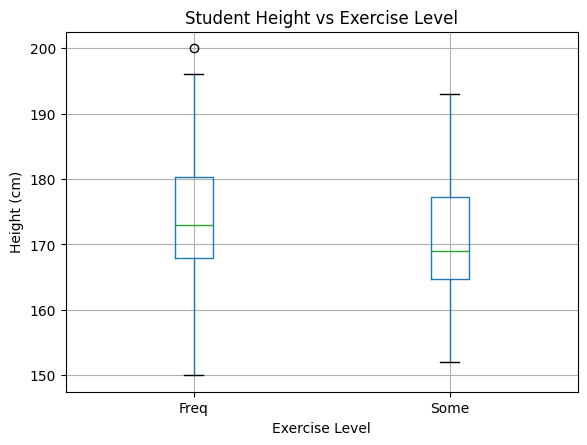

In [50]:
df.boxplot(column='Height', by='Exer')
plt.xlabel('Exercise Level')
plt.ylabel('Height (cm)')
plt.title('Student Height vs Exercise Level')
plt.suptitle('')
plt.show()

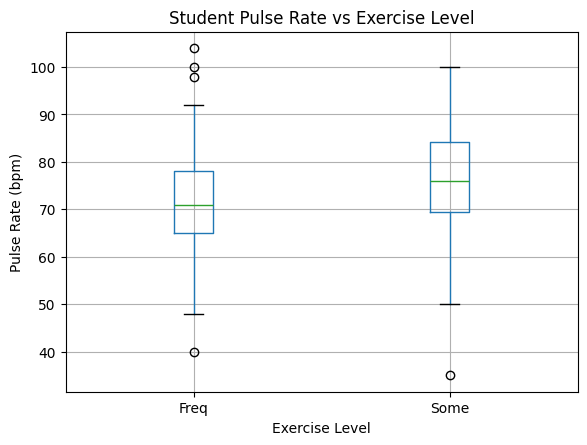

In [51]:
df.boxplot(column='Pulse', by='Exer')
plt.xlabel('Exercise Level')
plt.ylabel('Pulse Rate (bpm)')
plt.title('Student Pulse Rate vs Exercise Level')
plt.suptitle('')
plt.show()

### 8. Do the same for pulse rates and smoking habits. What do you notice?

For the smoking habits, I notice that in this dataset:
- Heavy smokers have the highest average and minimum heart rate, but also the lowest maximum.
- Regular smokers have the lowest average and highest maximum heart rate.
- People that never smoke cover the biggest range (as is expected since they represent 80% of the dataset).

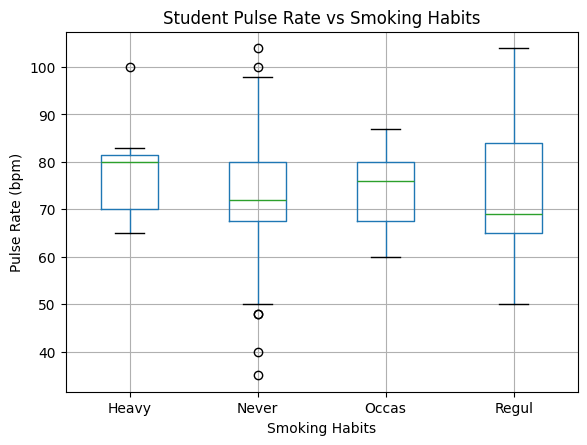

In [53]:
df.boxplot(column='Pulse', by='Smoke')
plt.xlabel('Smoking Habits')
plt.ylabel('Pulse Rate (bpm)')
plt.title('Student Pulse Rate vs Smoking Habits')
plt.suptitle('')
plt.show()

### 9. Make scatter plots for all pairwise combinations of span of writing hand, span of non-writing hand, and height of the student. What do you notice?

From the scatter plots, I notice that the spans of the two hands show a strong linear correlation, while the relationship between hand spans and height shows a similar trend but with significantly more spread.

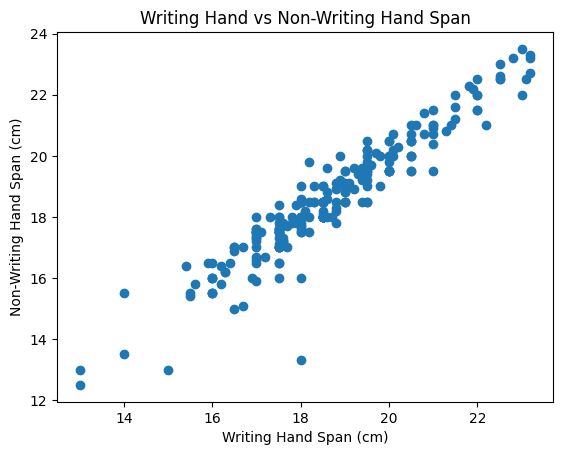

In [55]:
plt.scatter(df['Wr.Hnd'], df['NW.Hnd'])
plt.xlabel('Writing Hand Span (cm)')
plt.ylabel('Non-Writing Hand Span (cm)')
plt.title('Writing Hand vs Non-Writing Hand Span')
plt.show()

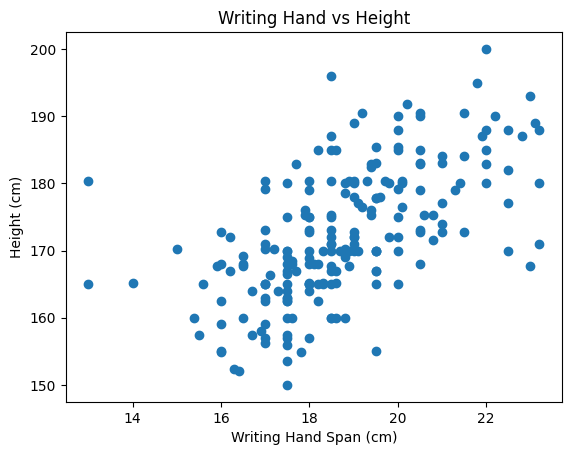

In [56]:
plt.scatter(df['Wr.Hnd'], df['Height'])
plt.xlabel('Writing Hand Span (cm)')
plt.ylabel('Height (cm)')
plt.title('Writing Hand vs Height')
plt.show()

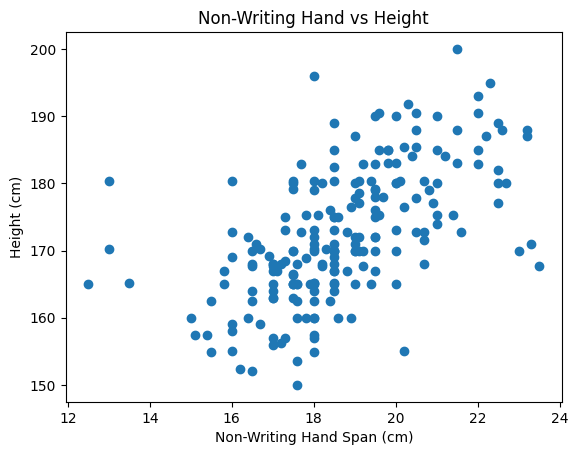

In [57]:
plt.scatter(df['NW.Hnd'], df['Height'])
plt.xlabel('Non-Writing Hand Span (cm)')
plt.ylabel('Height (cm)')
plt.title('Non-Writing Hand vs Height')
plt.show()